## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
df = pd.read_excel(r"C:\Users\Krishna\Downloads\engine_data.xlsx")
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700.0,2.493592,11.790927,3.178981,84.144163,81.632187,1.0
1,876.0,2.941606,16.193866,2.464504,77.640934,82.445724,0.0
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1.0
3,473.0,3.707835,19.510172,3.727455,74.129907,71.774629,1.0
4,619.0,5.672919,15.738871,2.052251,78.396989,87.000225,0.0


## Feature Engineering

In [3]:
df.shape

(19535, 7)

In [4]:
## Rounding off the digits to 2 in the float variables

cols = ['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp']

for col in  cols:
    df[col]=df[col].round(2)

In [5]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700.0,2.49,11.79,3.18,84.14,81.63,1.0
1,876.0,2.94,16.19,2.46,77.64,82.45,0.0
2,520.0,2.96,6.55,1.06,77.75,79.65,1.0
3,473.0,3.71,19.51,3.73,74.13,71.77,1.0
4,619.0,5.67,15.74,2.05,78.40,87.00,0.0


In [6]:
## Checking th missing values

df.isna().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [7]:
## Chaecking the datatypes

df.dtypes

Engine rpm          float64
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition    float64
dtype: object

In [8]:
df['Engine Condition'] = df['Engine Condition'].map({1.0:1,0.0:0})   ## Mapping the Variables in the target columns from "1.0" and "0.0" to "1" and "0"

In [9]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700.0,2.49,11.79,3.18,84.14,81.63,1
1,876.0,2.94,16.19,2.46,77.64,82.45,0
2,520.0,2.96,6.55,1.06,77.75,79.65,1
3,473.0,3.71,19.51,3.73,74.13,71.77,1
4,619.0,5.67,15.74,2.05,78.40,87.00,0


In [10]:
## changing the datatype from float to int

col = ['Engine rpm','Engine Condition']

for i in col:
    df[i]= df[i].astype(int)

In [11]:
## Datatypes changed

df.dtypes

Engine rpm            int32
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition      int32
dtype: object

In [12]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.49,11.79,3.18,84.14,81.63,1
1,876,2.94,16.19,2.46,77.64,82.45,0
2,520,2.96,6.55,1.06,77.75,79.65,1
3,473,3.71,19.51,3.73,74.13,71.77,1
4,619,5.67,15.74,2.05,78.40,87.00,0


In [13]:
## Checking the correlation between varibles

df.corr()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
Engine rpm,1.000000,0.025049,-0.001570,-0.025029,0.052143,0.029558,-0.268201
Lub oil pressure,0.025049,1.000000,0.043781,-0.009334,-0.008060,-0.060921,0.060922
Fuel pressure,-0.001570,0.043781,1.000000,0.033274,-0.025316,-0.042993,0.116269
Coolant pressure,-0.025029,-0.009334,0.033274,1.000000,-0.020764,0.033457,-0.024066
lub oil temp,0.052143,-0.008060,-0.025316,-0.020764,1.000000,0.072912,-0.093646
Coolant temp,0.029558,-0.060921,-0.042993,0.033457,0.072912,1.000000,-0.046328
Engine Condition,-0.268201,0.060922,0.116269,-0.024066,-0.093646,-0.046328,1.000000


<AxesSubplot:>

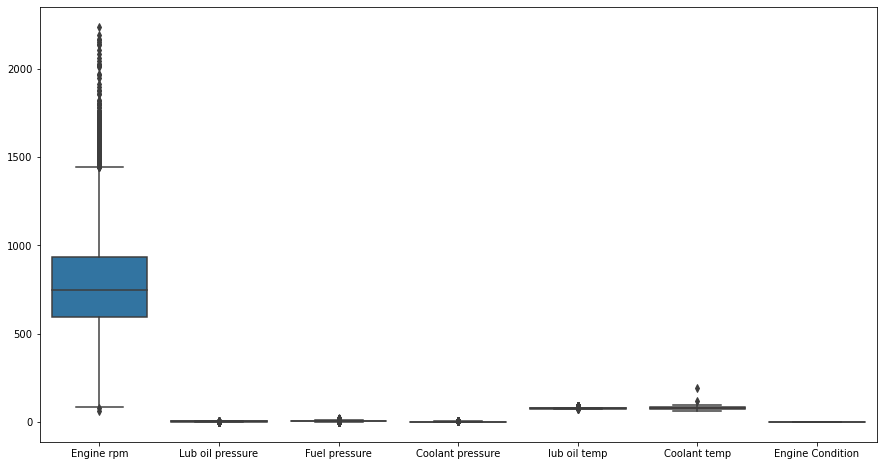

In [14]:
## Checking out the outliers in the dataset


plt.rcParams['figure.figsize'] = [15,8]
sns.boxplot(data=df)

## Removing the outliers using the Z Score method

In [26]:
## USIng the Z-score method as the data is normally distributed

columns = ['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp']


for col in columns:
    lower_limit = df[col].mean() - 3 * df[col].std()
    upper_limit = df[col].mean() +3* df[col].std()
    
    df[col] = np.where(df[col]>upper_limit,upper_limit,
                      np.where(df[col]<lower_limit,lower_limit,df[col]
                              )
                      )

<AxesSubplot:>

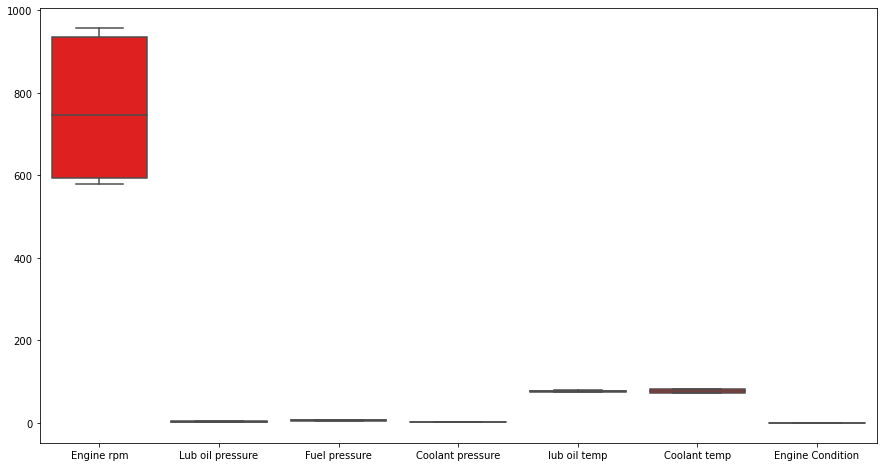

In [27]:
## No outliers present

sns.boxplot(data=df,color='red')

## EDA

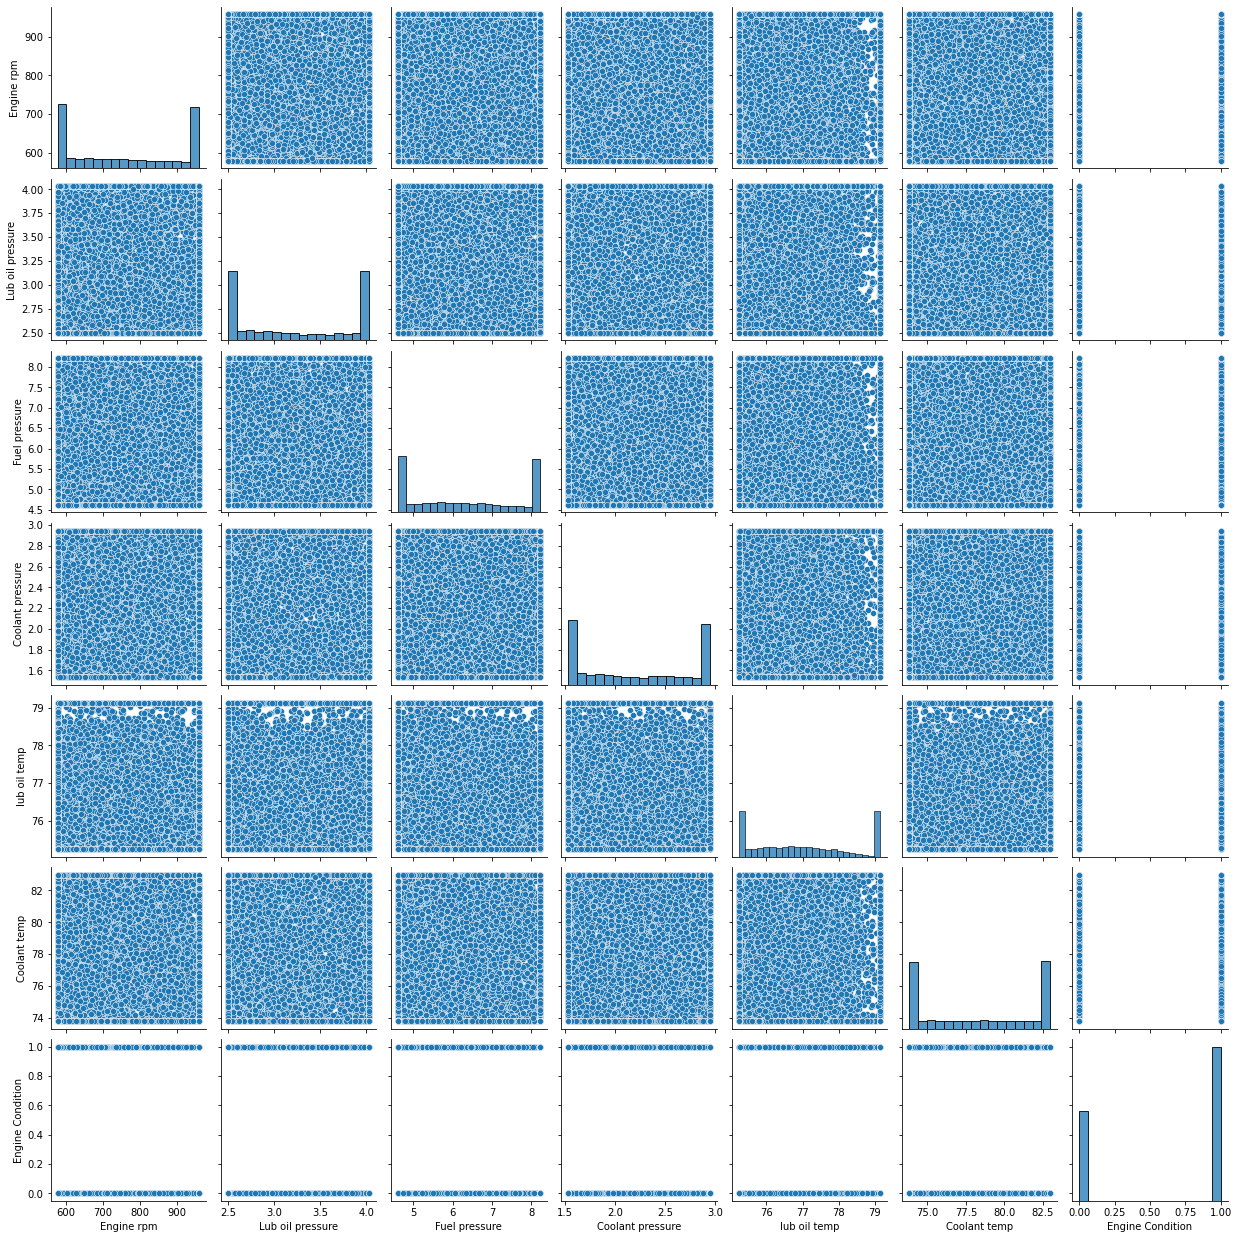

In [28]:
sns.pairplot(data=df,kind = 'scatter',hue_order=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure'])

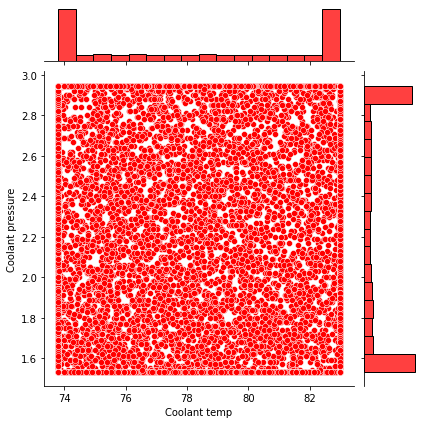

In [29]:
plt.rcParams['figure.figsize'] = [15,8]
sns.jointplot(x = df['Coolant temp'],y = df['Coolant pressure'],color='red')

In [30]:
df['Engine rpm'] = df['Engine rpm'].astype(int)

<AxesSubplot:xlabel='Engine rpm', ylabel='Density'>

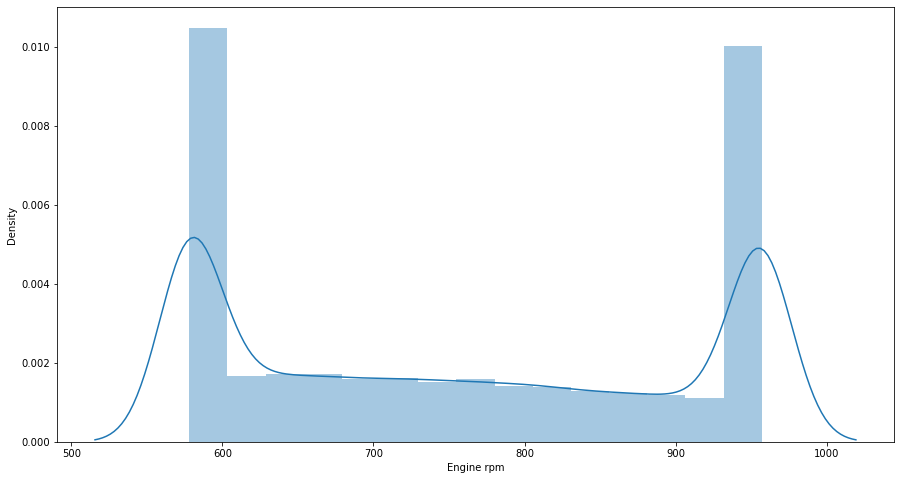

In [31]:
sns.distplot(df['Engine rpm'])

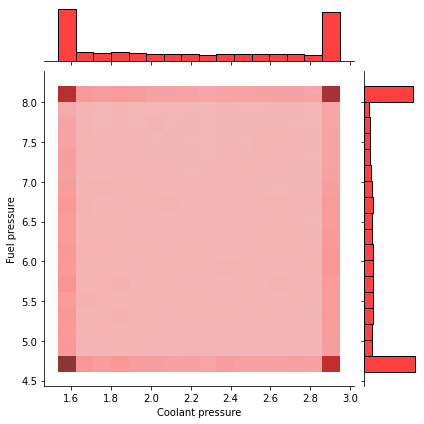

In [32]:
sns.jointplot(data=df,x=df['Coolant pressure'],y=df['Fuel pressure'],kind='hist',color='red',)

## Model Building

In [33]:
y = df[['Engine Condition']]

x = df.drop(columns = ['Engine Condition'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [36]:
len(x_train),len(x_test),len(y_train),len(y_test)

(15628, 3907, 15628, 3907)

In [37]:
## Using Pipeline to build a Decision Tree

step1 = DecisionTreeClassifier(criterion='entropy',max_depth=25,random_state=0)

pipe1 = Pipeline([('step1',step1)])

In [38]:
## Fitting and predicting the model

pipe1.fit(x,y)

y_pred = pipe1.predict(x_test)

In [39]:
## Importing the necessary metrics

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc

In [40]:
## Confusion matrix for Decision Tree

cm=confusion_matrix(y_test['Engine Condition'],y_pred,labels=pipe1.classes_)

In [41]:
## Plotting a Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe1.classes_)

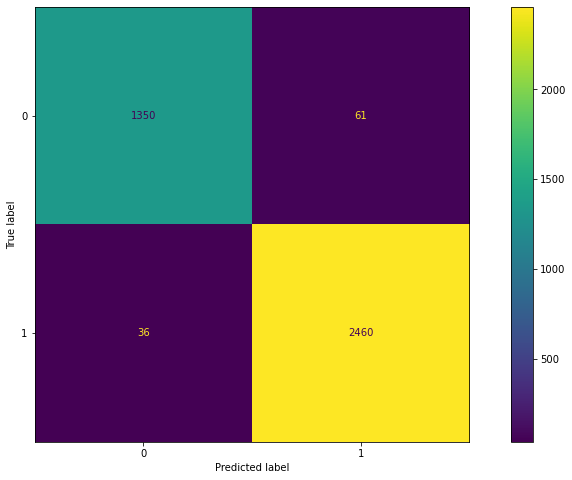

In [42]:
disp.plot()

In [43]:
## Classification Report for the Decsion Tree

print("classification report for decision tree:",classification_report(y_test['Engine Condition'],y_pred))

classification report for decision tree:               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1411
           1       0.98      0.99      0.98      2496

    accuracy                           0.98      3907
   macro avg       0.97      0.97      0.97      3907
weighted avg       0.98      0.98      0.98      3907



# Building a Roc curve

In [44]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

In [45]:
auc_score = auc(fpr,tpr)

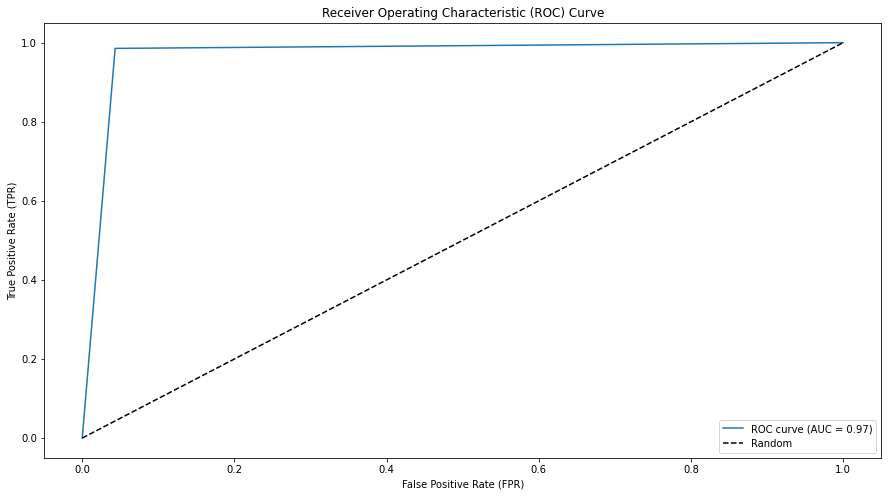

In [46]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Auc(Area under the curve) = 0.97,
Value of AuC>0.5 then the model is good at distinguishing between two classes.
Higher the AuC, the better.

## Building a Random Forest

In [47]:

step2 = RandomForestClassifier(n_estimators=1000,max_depth=50,random_state=0)


pipe2 = Pipeline([('step2',step2)])


pipe2.fit(x,y)

Pipeline(steps=[('step2',
                 RandomForestClassifier(max_depth=50, n_estimators=1000,
                                        random_state=0))])

In [48]:
## Predicting the Random Forest Model

y_pred = pipe2.predict(x_test)

In [49]:
## Confusion Matrix for the Random Forest

cm1 = confusion_matrix(y_test['Engine Condition'],y_pred,labels=pipe2.classes_)

In [50]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=pipe2.classes_)

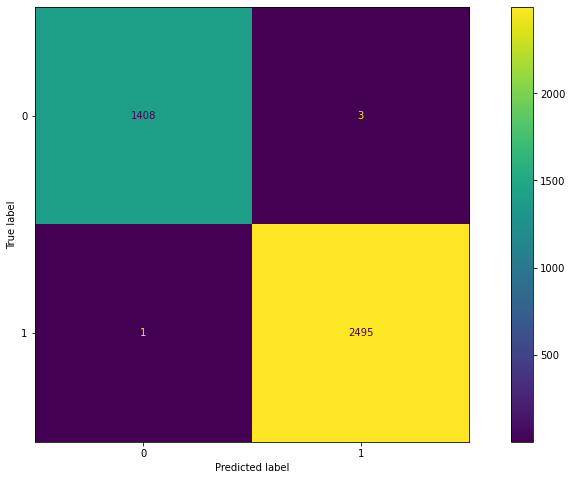

In [51]:
## Plotting the confusion matrix for the Random Forest

disp2.plot()

1) The total no of true positive values is 1408 
2) The total no of true negative values is 2495

## Roc curve for the random forest

In [52]:
tpr,fpr,threshold = roc_curve(y_test['Engine Condition'],y_pred)

In [53]:
auc_curve1 = auc(fpr,tpr)

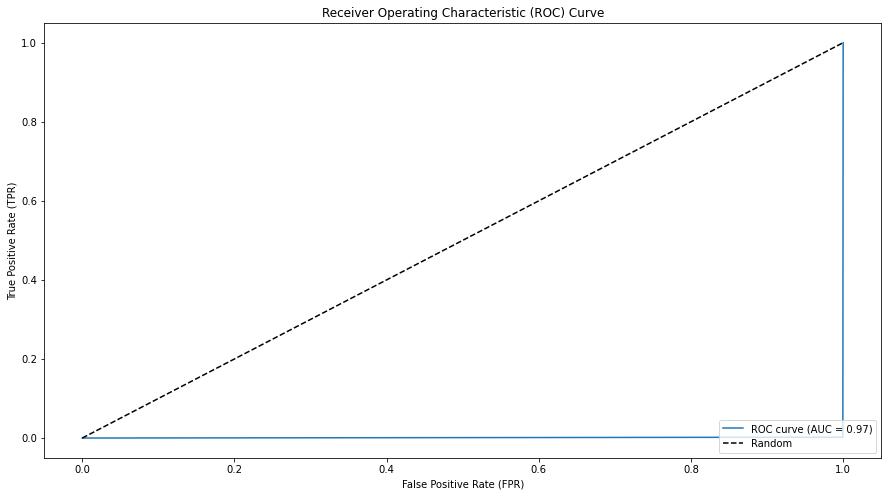

In [54]:
plt.plot(fpr,tpr,label ='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
## Classification report for the Random Forest

print("Classification report using Random Forest :",classification_report(y_test['Engine Condition'],y_pred))

Classification report using Random Forest :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1411
           1       1.00      1.00      1.00      2496

    accuracy                           1.00      3907
   macro avg       1.00      1.00      1.00      3907
weighted avg       1.00      1.00      1.00      3907



In [56]:
from sklearn.metrics import accuracy_score

In [57]:
## Accuracy for the Random Forest

accuracy_score(y_test['Engine Condition'],y_pred)


0.9989761965702585